In [30]:
import csv
with open('mushrooms.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
['p', 'x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u']
['e', 'x', 's', 'y', 't', 'a', 'f', 'c', 'b', 'k', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'g']
['e', 'b', 's', 'w', 't', 'l', 'f', 'c', 'b', 'n', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'm']
['p', 'x', 'y', 'w', 't', 'p', 'f', 'c', 'n', 'n', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u']
['e', 'x', 's', 'g', 'f', 'n', 'f', 'w', 'b', 'k', 't', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'e', 'n', 'a', 'g']
['e', 'x', 'y', 'y', 't', 'a', 'f', 'c', 'b', 'n',

In [32]:
import pandas as pd

# Load the dataset
data = pd.read_csv('mushrooms.csv')

# Check for missing values

missing_count = 0
not_missing_count = 0

for n in data:
    if pd.isna(n) or str(n).strip().lower() in ['nan', 'none', '']:
        missing_count += 1
    else:
        not_missing_count += 1

print("Missing:", missing_count)
print("Not missing:", not_missing_count)

Missing: 0
Not missing: 23


Confusion Matrix:
[[843   0]
 [  0 782]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



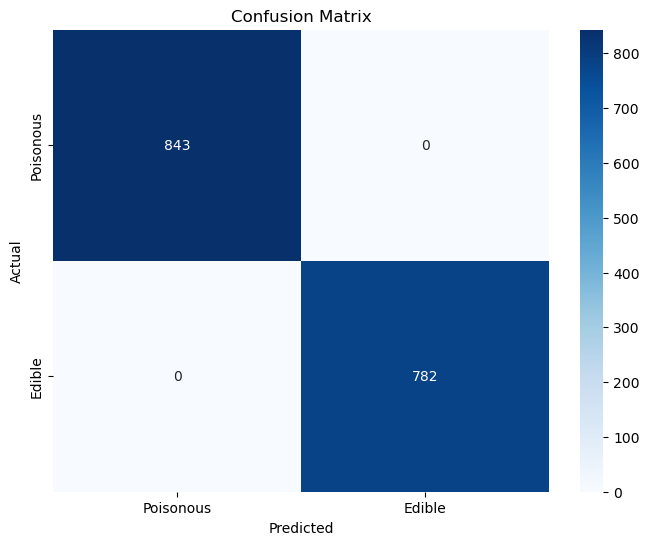

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mushrooms.csv')

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop('class_p', axis=1)  # Features (assuming 'class_p' is the target)
y = data_encoded['class_p']  # Target variable (edibility)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred)
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [3]:
print(len((data.columns)))

23


C:\Users\celin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\celin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\celin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\celin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\celin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

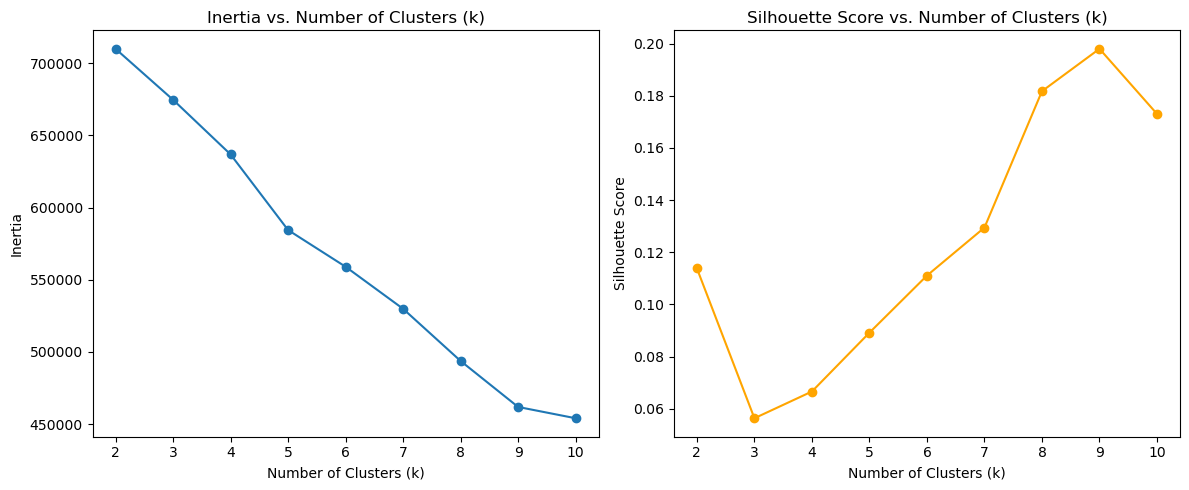

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mushrooms.csv')

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y) - we won't use y for clustering
X = data_encoded.drop('class_p', axis=1)  # Drop target variable

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of values for k
k_values = range(2, 11)  # Trying k from 2 to 10
inertia = []
silhouette_scores = []

# Train K-Means for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate inertia (sum of squared distances to closest centroid)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the results for evaluation
plt.figure(figsize=(12, 5))

# Inertia Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Inertia vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
data = pd.read_csv('mushrooms.csv')

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y)
X = data_encoded.drop('class_p', axis=1)  # Features
y = data_encoded['class_p']  # Target variable (edibility)

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold Cross-Validation for Classification Model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf = DecisionTreeClassifier(random_state=42)

# Evaluate using cross_val_score for classification
classification_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
print("Classification Model Accuracy Scores:", classification_scores)
print("Mean Classification Accuracy:", np.mean(classification_scores))

# K-Fold Cross-Validation for Clustering Model
k_values = range(2, 11)  # Trying k from 2 to 10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    fold_silhouette_scores = []

    for train_index, test_index in kf.split(X_scaled):
        X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
        kmeans.fit(X_train_fold)
        
        # Calculate silhouette score for the test fold
        score = silhouette_score(X_test_fold, kmeans.predict(X_test_fold))
        fold_silhouette_scores.append(score)

    # Average silhouette score for the current k
    silhouette_scores.append(np.mean(fold_silhouette_scores))

# Display silhouette scores for clustering
for k, score in zip(k_values, silhouette_scores):
    print(f"Average Silhouette Score for k={k}: {score:.4f}")

Classification Model Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Classification Accuracy: 1.0
Average Silhouette Score for k=2: 0.0947
Average Silhouette Score for k=3: 0.0986
Average Silhouette Score for k=4: 0.1190
Average Silhouette Score for k=5: 0.1392
Average Silhouette Score for k=6: 0.1588
Average Silhouette Score for k=7: 0.1672
Average Silhouette Score for k=8: 0.1486
Average Silhouette Score for k=9: 0.1639
Average Silhouette Score for k=10: 0.1797


In [ ]:
# Classification: 100% accuracy
# Clustering: Weak separation, based on silhouette scores, 
# not a great structure for natural clusters in the data
# These relatively low scores indicate that the mushroom data does not naturally 
# form distinct clusters corresponding to the target classes.